In [4]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [10]:
df=pd.read_csv("C:\\Users\\admin\\Desktop\\CODESOFT-Data Science\\task_4\\advertising.csv")

In [12]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [16]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Data cleaning 

In [19]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

- There are no missing values in the dataset,proceeding directly to analysis.

# Exploratory data analysis

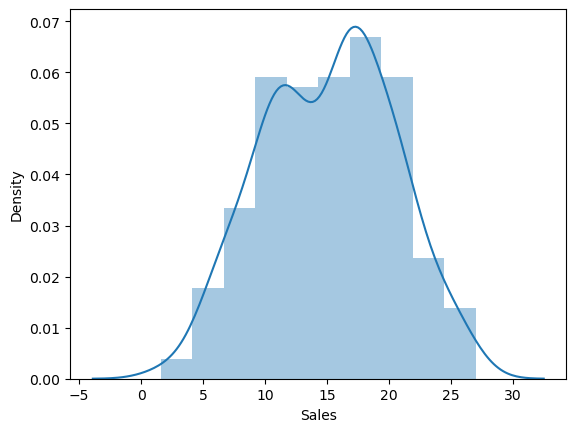

In [43]:
sns.distplot(df['Sales'])
plt.show()

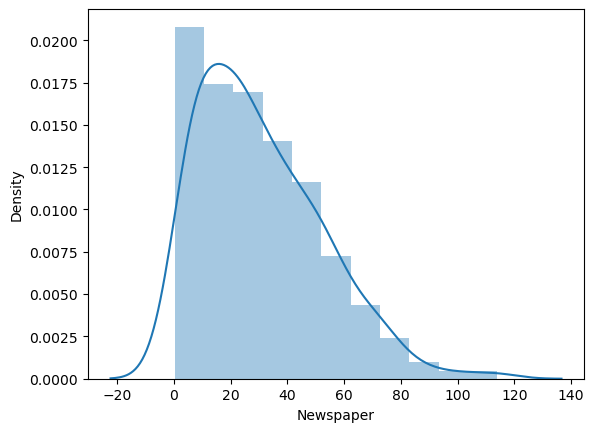

In [47]:
sns.distplot(df['Newspaper'])
plt.show()

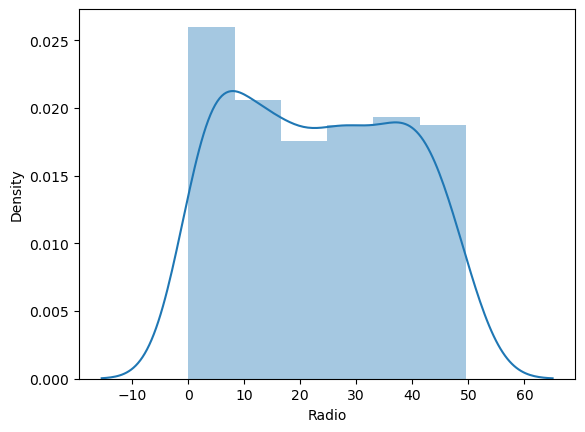

In [49]:
sns.distplot(df['Radio'])
plt.show()

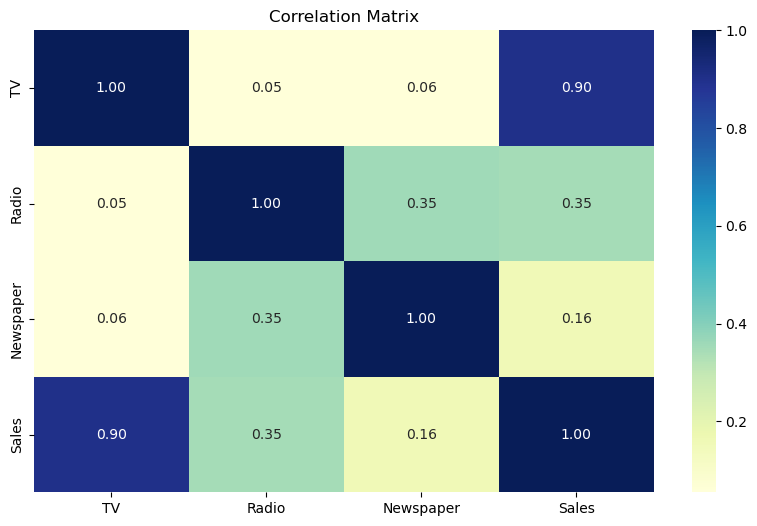

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [33]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
# Plot the heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

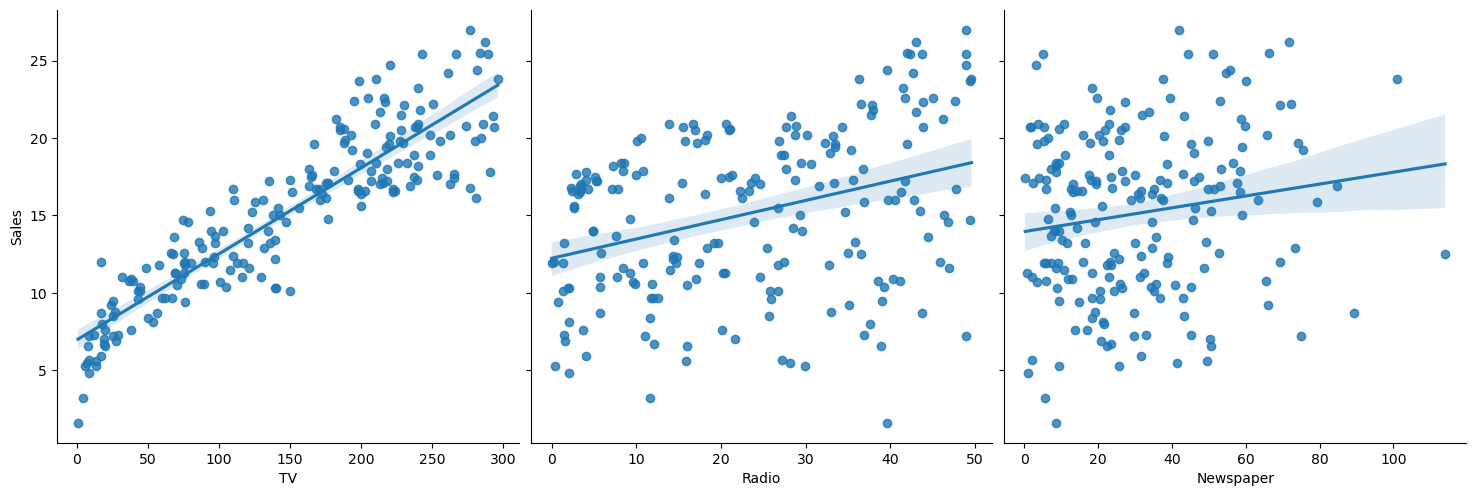

In [57]:
sns.pairplot(df, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = 'Sales', height = 5, kind = 'reg')
plt.show()


# Model Building (Simple Linear Regression)

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the feature (TV) and target (Sales)
X = df[['TV']]
y = df['Sales']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 6.101072906773963
R-squared: 0.802561303423698


In [63]:
# Define the feature (TV) and target (Sales)
X = df[['Radio']]
y = df['Sales']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 27.595581948583174
R-squared: 0.10697088619553419


In [65]:
# Define the feature (TV) and target (Sales)
X = df[['Newspaper']]
y = df['Sales']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 30.759376922769615
R-squared: 0.004586344085821592


- Mean Squared Error (MSE): Indicates how much the predicted sales deviate from the actual sales.
- R-squared: Measures how well the independent variable (TV advertising) explains the variance in the dependent variable (sales).

# Model Evaluation

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Features and target
X_tv = df[['TV']]
X_radio = df[['Radio']]
X_newspaper = df[['Newspaper']]
y = df['Sales']

# Split data for TV
X_train_tv, X_test_tv, y_train_tv, y_test_tv = train_test_split(X_tv, y, test_size=0.2, random_state=42)
model_tv = LinearRegression()
model_tv.fit(X_train_tv, y_train_tv)
y_pred_tv = model_tv.predict(X_test_tv)

# Split data for Radio
X_train_radio, X_test_radio, y_train_radio, y_test_radio = train_test_split(X_radio, y, test_size=0.2, random_state=42)
model_radio = LinearRegression()
model_radio.fit(X_train_radio, y_train_radio)
y_pred_radio = model_radio.predict(X_test_radio)

# Split data for Newspaper
X_train_newspaper, X_test_newspaper, y_train_newspaper, y_test_newspaper = train_test_split(X_newspaper, y, test_size=0.2, random_state=42)
model_newspaper = LinearRegression()
model_newspaper.fit(X_train_newspaper, y_train_newspaper)
y_pred_newspaper = model_newspaper.predict(X_test_newspaper)

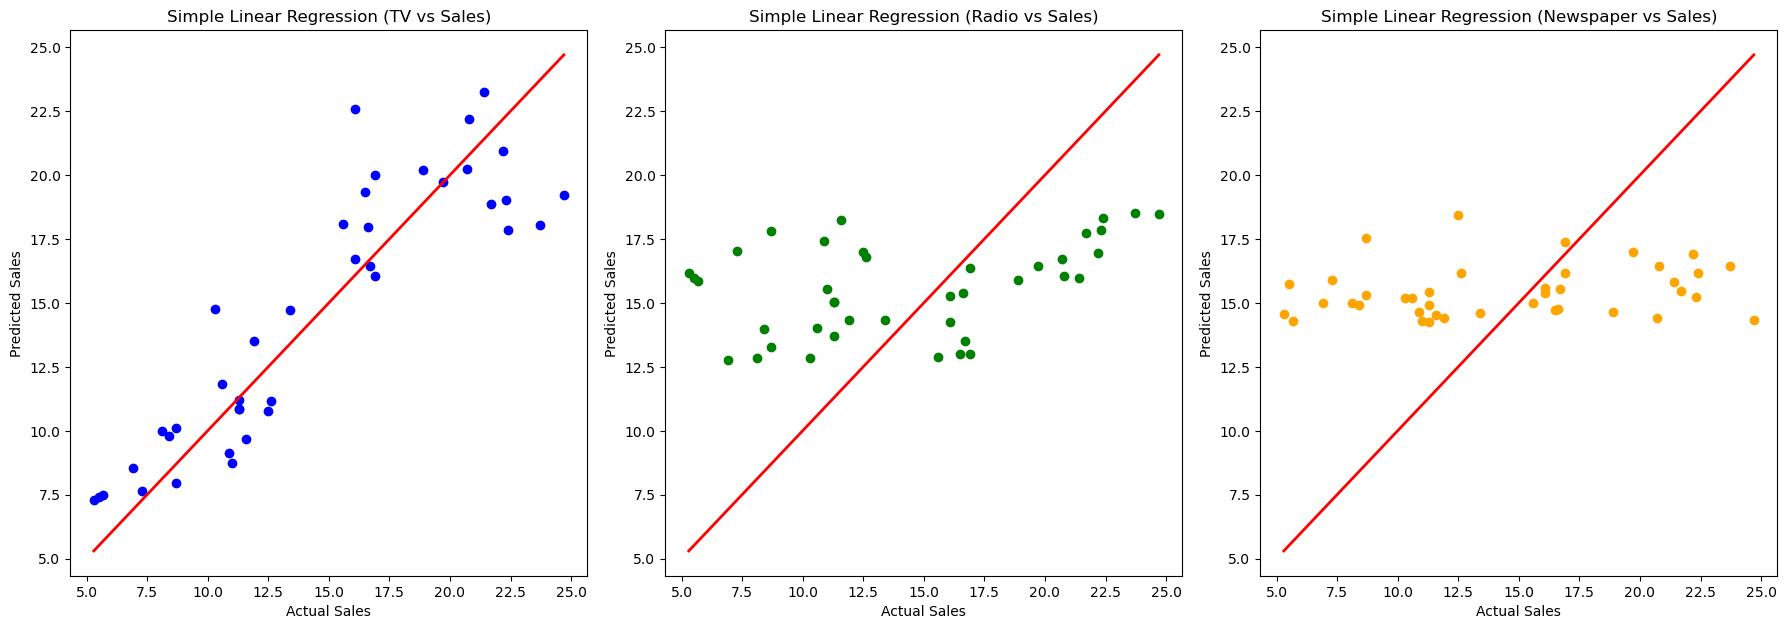

In [89]:
plt.figure(figsize=(18, 12))

# TV: Predicted vs Actual
plt.subplot(2, 3, 1)
plt.scatter(y_test_tv, y_pred_tv, color='blue')
plt.plot([y_test_tv.min(), y_test_tv.max()], [y_test_tv.min(), y_test_tv.max()], color='red', lw=2)
plt.title("Simple Linear Regression (TV vs Sales)")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")


# Radio: Predicted vs Actual
plt.subplot(2, 3, 2)
plt.scatter(y_test_radio, y_pred_radio, color='green')
plt.plot([y_test_radio.min(), y_test_radio.max()], [y_test_radio.min(), y_test_radio.max()], color='red', lw=2)
plt.title("Simple Linear Regression (Radio vs Sales)")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")


# Newspaper: Predicted vs Actual
plt.subplot(2, 3, 3)
plt.scatter(y_test_newspaper, y_pred_newspaper, color='orange')
plt.plot([y_test_newspaper.min(), y_test_newspaper.max()], [y_test_newspaper.min(), y_test_newspaper.max()], color='red', lw=2)
plt.title("Simple Linear Regression (Newspaper vs Sales)")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")


plt.tight_layout()
plt.show()